# Logistic Regression

In [1]:
# Importing libraries
import time, psutil, os, math
from tqdm.contrib import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logistic Function

A function $g: \mathbb{R} \to \mathbb{R}$ is said to be a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) if it has the following properties:
- It is [bounded](https://en.wikipedia.org/wiki/Bounded_function)
- It is [differentiable](https://en.wikipedia.org/wiki/Differentiable_function)
- It has nonnegative derivative at each point
- It has exactly one [inflection point](https://en.wikipedia.org/wiki/Inflection_point)

An example of a sigmoid function is the standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function) (sometimes simply referred to as the *sigmoid*), which is given by

$$ g(x) = \frac{1}{1+e^{-x}}, $$

for $x \in \mathbb{R}$. The next two code blocks construct and plot this function.

logistic(0) = 0.5
logistic([-5 -1  1  5]) = [0.00669285 0.26894142 0.73105858 0.99330715]


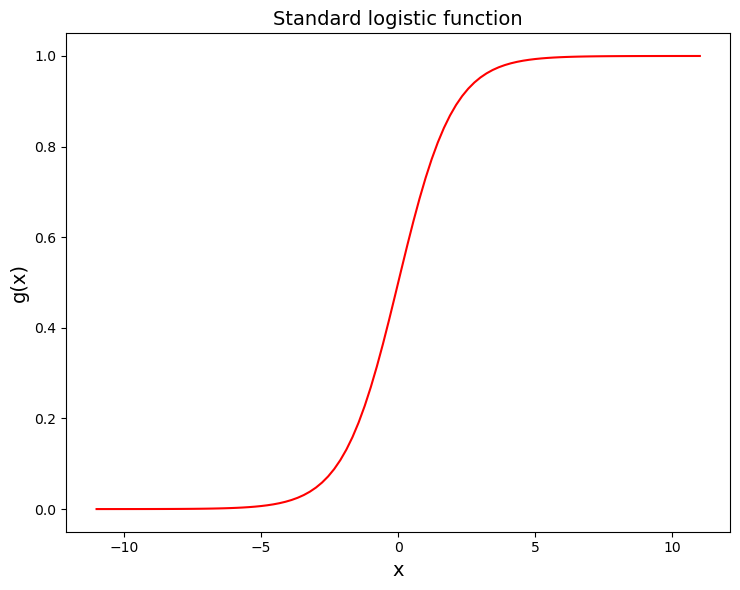

In [2]:
# Logistic function
def logistic(x):
    """
    Computes the logistic function applied to an input scalar/array
    Args:
        x (scalar/ndarray): scalar or numpy array of any size
    Returns:
        y (scalar/ndarray): logistic function applied to x, has the same shape as x
    """
    y = 1 / (1 + np.exp(-x))
    return y

x, x_arr = 0, np.array([-5, -1, 1, 5])
print(f"logistic({x}) = {logistic(x)}")
print(f"logistic({x_arr}) = {logistic(x_arr)}")

# Plotting the logistic function
plt.figure(figsize = (7.5, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

# Log Loss

The `loss function`, which corresponds to the *true value* and *predicted value* of a single observation. The `cost function` can be thought of as *expected loss* or *average loss* over a group of observations. Contrary to linear regression, which employs `squared loss`, logistic regression makes use of the `log loss` function, given by

$$ L(y, y') = -y \log\left(y'\right) - \left(1 - y\right) \log\left(1 - y'\right), $$

where $y$ is the true value of a binary target (taking values $0$ or $1$) and $y'$ is the prediction, which can be thought of as the predicted probability of $y$ being $1$. Observe that the loss is $0$, when the true value and predicted value agree with each other, i.e. $L(0, 0) = L(1, 1) = 0$. On the other hand, the loss explodes towards infinity if the predicted value approaches $1$ when the true value is $0$, or it approaches $0$ when the true value is $1$. Mathematically, $\lim_{t \to 1-} L(0, t) = \lim_{t \to 0+} L(1, t) = \infty$. In the next couple of code blocks, we construct the function to compute log loss and plot it for $y = 0$ and $y = 1$. Since the true values (labels) are always $0$ or $1$, we do not need to pay heed to the behaviour of the function $L$ for other values of $y$.

log_loss(0, 0.6) = 0.916290731874155


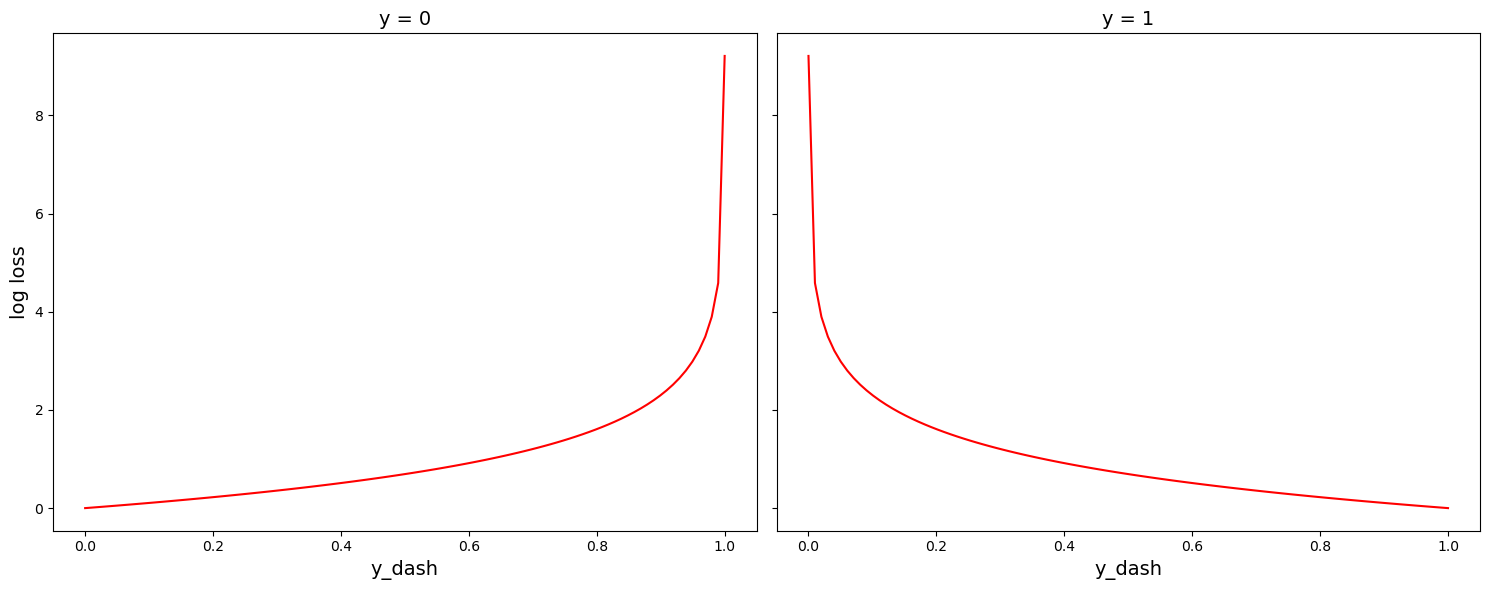

In [3]:
# Log loss
def log_loss(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (scalar): true value (0 or 1)
      y_dash (scalar): predicted value (probability of y being 1)
    Returns:
      loss (float): nonnegative loss corresponding to y and y_dash
    """
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

The plots sync with the intuition that loss should be minimum when the predicted value (probability) matches the true value $(0$ or $1)$, and should increase as the two values drift apart.

# Cost Function

Let $\mathbf{y} = (y_1, y_2, \cdots, y_n)$ be the true values $(0$ or $1)$ and $\mathbf{y'} = (y_1', y_2', \cdots, y_n')$ be the corresponding predictions (probabilities). Then, the *cost function* is given by the average loss:

$$ C(\mathbf{y}, \mathbf{y'}) = \frac{1}{m}\sum_{i = 1}^m L(y_i, y_i'). $$

We construct the function to compute cost in the following two code blocks (the first one using for loop, the second one using vectorization). An important structural distinction from the log loss function is that here the arguments `y` and `y_dash` are vectors, not scalars.

In [4]:
# Cost function - using for loop
def cost_func(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (array_like, shape (m,)): array of true values (0 or 1)
      y_dash (array_like, shape (m,)): array of predicted values (probability of y being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    cost = 0
    for i in range(m):
        cost += log_loss(y[i], y_dash[i])
    cost = cost / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [5]:
# Cost function - using vectorization
def cost_func_vec(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (array_like, shape (m,)): array of true values (0 or 1)
      y_dash (array_like, shape (m,)): array of predicted values (probability of y being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func_vec({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func_vec([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


Let us assume that we want to predict $y$ based on $n$ features. In this setup, a logistic regression model is characterized by $n+1$ parameters:

- weight parameters $\mathbf{w} = (w_1, w_2, \cdots, w_n)$
- bias parameter $b$

Note that, the [dot product](https://en.wikipedia.org/wiki/Dot_product) of two vectors $\mathbf{a} = (a_1, a_2, \cdots, a_n)$ and $\mathbf{b} = (b_1, b_2, \cdots, b_n)$ is given by $\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^n a_ib_i$. It is a scalar value and evidently, $\mathbf{a} \cdot \mathbf{b} = \mathbf{b} \cdot \mathbf{a}$. Given the realized values of $n$ features $\mathbf{x} = (x_1, x_2, \cdots, x_n)$, the model feeds $\mathbf{x} \cdot \mathbf{w} + b$ to the logistic function $g$, and projects the output as the predicted probability of $y = 1$. Concretely, we have

$$ y' = g\left(\mathbf{x} \cdot \mathbf{w} + b\right) = \frac{1}{1 + e^{-\left(\mathbf{x} \cdot \mathbf{w} + b\right)}}. \tag{1} $$

Let us consider the situation of $m$ observations, with the $i$th observation having feature values $\mathbf{x_i} = (x_{i,1}, x_{i,2}, \cdots, x_{i,n})$, true target value $y_i$ and predicted probabilities $y_i' = g\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)$. Stacking them up, we obtain the feature matrix $\mathbf{X}$, target vector $\mathbf{y}$ and the vector of predicted probability $\mathbf{y'}$, as follows:

$$ \mathbf{X} = \begin{pmatrix}
\mathbf{x_1} \newline
\mathbf{x_2} \newline
\vdots \newline
\mathbf{x_m}
\end{pmatrix} = \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \newline
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \newline
\vdots & \vdots & \ddots & \vdots \newline
x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{pmatrix},\;\;\;\;
\mathbf{y} = \begin{pmatrix}
y_1 \newline
y_2 \newline
\vdots \newline
y_m
\end{pmatrix},\;\;\;\;
\mathbf{y'} = \begin{pmatrix}
g\left(\mathbf{x_1} \cdot \mathbf{w} + b\right) \newline
g\left(\mathbf{x_2} \cdot \mathbf{w} + b\right) \newline
\vdots \newline
g\left(\mathbf{x_n} \cdot \mathbf{w} + b\right)
\end{pmatrix}. \tag{2} $$

Now, we are in a position to rewrite the cost function in terms of model parameters:

$$ J\left(\mathbf{w}, b\right) := C\left(\mathbf{y}, \mathbf{y'} \,\vert\, \mathbf{X}, \mathbf{w}, b \right) = \frac{1}{m}\sum_{i = 1}^m L\left(y_i, \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) = \frac{1}{m}\sum_{i = 1}^m \left[ -y_i \log\left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) - \left(1 - y_i\right) \log\left(1 - \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) \right]. \tag{3} $$

Note that $J\left(\mathbf{0}, 0\right) = \log{2}$ for every input data $\mathbf{X}$ (features) and $\mathbf{y}$ (target). We construct a function to compute the cost, given data and model parameters, in the general setup of $n$ features (first using for loop, then using vectorization). Then, we visualize the cost function for a simplified setup, consisting of a single feature $x$. In this setup, the model involves two parameters only, the weight parameter $w$ and the bias parameter $b$.

In [6]:
# Function to compute cost function in terms of model parameters - using for loops
def cost_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values (0 or 1) of target
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = []
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        z.append(s + b)
    z = np.array(z)
    y_dash = logistic(z)
    cost = cost_func(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")

cost_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


The code for logistic function $g$ is constructed in such a way that, if applied on an array, it acts separately on each component and returns an array. Using this, it follows from $(2)$ that

$$ \mathbf{y'} = g\left(\mathbf{X} \mathbf{w} + b \mathbf{1} \right), $$

where $\mathbf{1}$ has the same dimension as that of $\mathbf{X} \mathbf{w}$. We use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) in computing $\mathbf{X} \mathbf{w}$, [scalar multiplication of a vector](https://en.wikipedia.org/wiki/Scalar_multiplication) in computing $b \mathbf{1}$ and add them up using [vector addition](https://en.wikipedia.org/wiki/Euclidean_vector#Addition_and_subtraction). This representation leads to a much faster vectorized implementation of computing the cost function in terms of model parameters.

cost_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


[Text(0.5, 0, 'w'), Text(0.5, 0.5, 'b')]

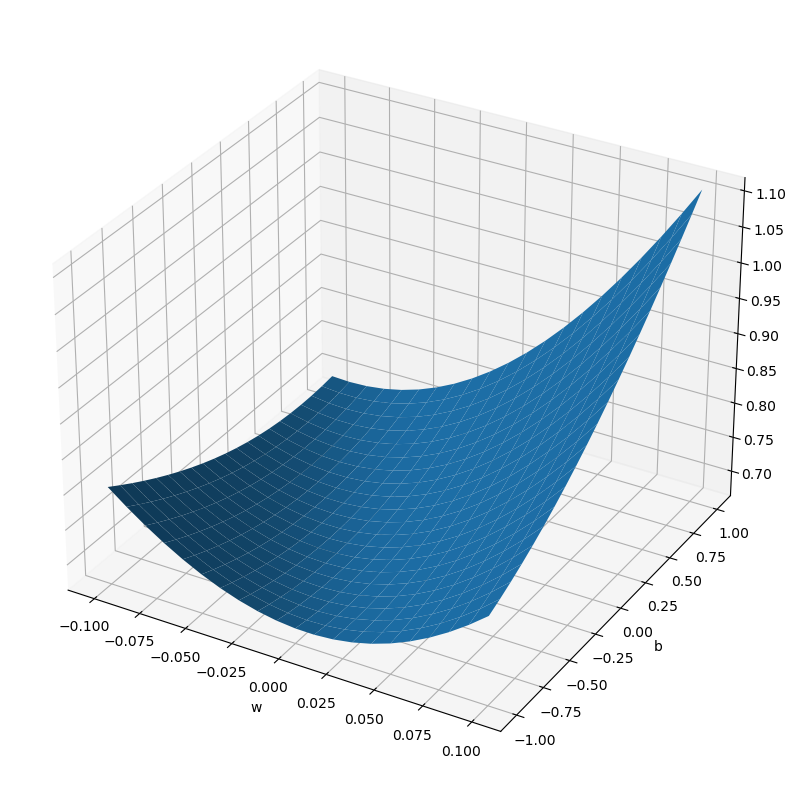

In [7]:
# Function to compute cost function in terms of model parameters - using vectorization
def cost_logreg_vec(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = logistic(z)
    cost = cost_func_vec(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")


# Plotting the cost function against model parameters
from mpl_toolkits.mplot3d import Axes3D
w, b = np.meshgrid(np.linspace(-0.1, 0.1, 21), np.linspace(-1, 1, 21))
X = np.array([1.56, 0.76 , 0.08, 9.71, 4.65, 4.35, 7.34, 0.91, 9.82, 9.05]).reshape((10, 1))
y = np.array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])
cost = np.array([[cost_logreg_vec(X, y, np.array([w0]), b0) for b0 in b[:, 0]] for w0 in w[0]])
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(w, b, cost)
ax.set(xlabel = "w", ylabel = "b")

In [8]:
# Function to compute gradients of the cost function with respect to model parameters - using for loops
def grad_logreg(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    grad_w, grad_b = np.zeros(n), 0
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        y_dash_i = logistic(s + b)
        for j in range(n):
            grad_w[j] += (y_dash_i  - y[i]) * X[i,j]
        grad_b += y_dash_i  - y[i]
    grad_w, grad_b = grad_w / m, grad_b / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg(X, y, w, b)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


The prediction $y'$ in $(1)$ can be converted to a decision by using a threshold value. For instance, suppose we take the threshold to be $0.5$. Then, we may classify the observation to class $1$ if $y' \geq 0.5$, and to class $0$ otherwise. The problem, however, is that we do not know the model parameters $\mathbf{w}$ and $b$, and hence cannot compute $y'$ directly. First, we have to fit the model by finding the best fitting parameters. Observe that, given the training data, $C\left(\mathbf{y}, \mathbf{y'}\right)$ depends on $\mathbf{w}$ and $b$ only. A reasonable strategy, therefore, is:

$$ \text{To minimise } J\left(\mathbf{w}, b\right), \text{ with respect to } \mathbf{w} \text{ and } b. $$

We shall employ the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) [algorithm](https://en.wikipedia.org/wiki/Algorithm) to solve this [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) problem.

# Gradiant Descent

**What is it?** The gradient descent algorithm is a [first order](https://en.wikipedia.org/wiki/Category:First_order_methods) [iterative](https://en.wikipedia.org/wiki/Iterative_method) optimization algorithm for finding a [local minimum](https://en.wikipedia.org/wiki/Maxima_and_minima) of a differentiable function. The idea is to take repeated steps in the opposite direction of the [gradient](https://en.wikipedia.org/wiki/Gradient) (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function. This procedure is then known as *gradient ascent*.

**History.** Gradient descent is generally attributed to [Augustin-Louis Cauchy](https://en.wikipedia.org/wiki/Augustin-Louis_Cauchy), who first suggested it in 1847. [Jacques Hadamard](https://en.wikipedia.org/wiki/Jacques_Hadamard) independently proposed a similar method in 1907. Its convergence properties for non-linear optimization problems were first studied by [Haskell Curry](https://en.wikipedia.org/wiki/Haskell_Curry) in 1944, with the method becoming increasingly well-studied and used in the following decades.

**The algorithm.** In the context of minimising the cost function $J$, with respect to the model parameters $\mathbf{w}$ and $b$, the gradient descent algorithm is given by:

$$ \begin{align*}
& \text{repeat until convergence:}\; \{ \newline
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j},\; \text{ for } j = 1, 2, \ldots, n; \newline
& b := b -  \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}. \tag{4} \newline
& \}
\end{align*} $$

where $\alpha$ is the [learning rate](https://en.wikipedia.org/wiki/Learning_rate), and the parameters $\mathbf{w} = (w_1, w_2, \cdots, w_n)$ and $b$ are updated simultaniously in each iteration.

**Computing gradient.** Before we can implement the gradient descent algorithm, we need to compute the gradients first! From $(3)$, we can compute the partial derivatives of $J$ with respect to $w_j$ and $b$ as follows:

$$ \begin{align*}
& \frac{\partial J(\mathbf{w},b)}{\partial w_j} = \frac{1}{m} \sum\limits_{i = 1}^m \left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}} - y_i\right) x_{i,j},\;\; \text{ for } j = 1, 2, \ldots, n; \newline
& \frac{\partial J(\mathbf{w}, b)}{\partial b} = \frac{1}{m} \sum\limits_{i = 1}^m \left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}} - y_i\right).
\end{align*} $$

The next code blocks construct a function to compute these gradients, first using for loops, then using vectorization.

In [9]:
# Function to compute gradients of the cost function with respect to model parameters - using for loops
def grad_logreg(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    grad_w, grad_b = np.zeros(n), 0
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        y_dash_i = logistic(s + b)
        for j in range(n):
            grad_w[j] += (y_dash_i  - y[i]) * X[i,j]
        grad_b += y_dash_i  - y[i]
    grad_w, grad_b = grad_w / m, grad_b / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg(X, y, w, b)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [10]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def grad_logreg_vec(X, y, w, b): 
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_dash = logistic(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_dash - y, X) / m
    grad_b = np.dot(y_dash - y, np.ones(m)) / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg_vec(X, y, w, b)}")

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


Armed with the required functions, we can now implement the gradient descent algorithm, given in $(4)$. 

In [11]:
# Gradient descent algorithm for logistic regression
def grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False): 
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = grad_logreg_vec(X, y, w, b)   
        w += - alpha * grad_w
        b += - alpha * grad_b
        cost =  cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},    Params  {params_history[i]}")
    return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

  0%|          | 0/100000 [00:00<?, ?it/s]

Iteration      0:    Cost  0.6928,    Params  [array([0.005 , 0.0025]), 0.0]
Iteration  10000:    Cost  0.0867,    Params  [array([19.30073125,  9.43918518]), -1.4078696585361679]
Iteration  20000:    Cost  0.0430,    Params  [array([25.11290735, 12.28127422]), -1.834529719071923]
Iteration  30000:    Cost  0.0283,    Params  [array([28.51960605, 13.947125  ]), -2.0845201374443225]
Iteration  40000:    Cost  0.0211,    Params  [array([30.9258698 , 15.12377399]), -2.261072754000602]
Iteration  50000:    Cost  0.0168,    Params  [array([32.78441957, 16.03259549]), -2.397428663482232]
Iteration  60000:    Cost  0.0139,    Params  [array([34.29765304, 16.77255979]), -2.5084448658725664]
Iteration  70000:    Cost  0.0119,    Params  [array([35.57340822, 17.39639871]), -2.602035975617821]
Iteration  80000:    Cost  0.0104,    Params  [array([36.67589743, 17.93551157]), -2.6829142826174595]
Iteration  90000:    Cost  0.0092,    Params  [array([37.64642667, 18.4100967 ]), -2.754110854922077]
I

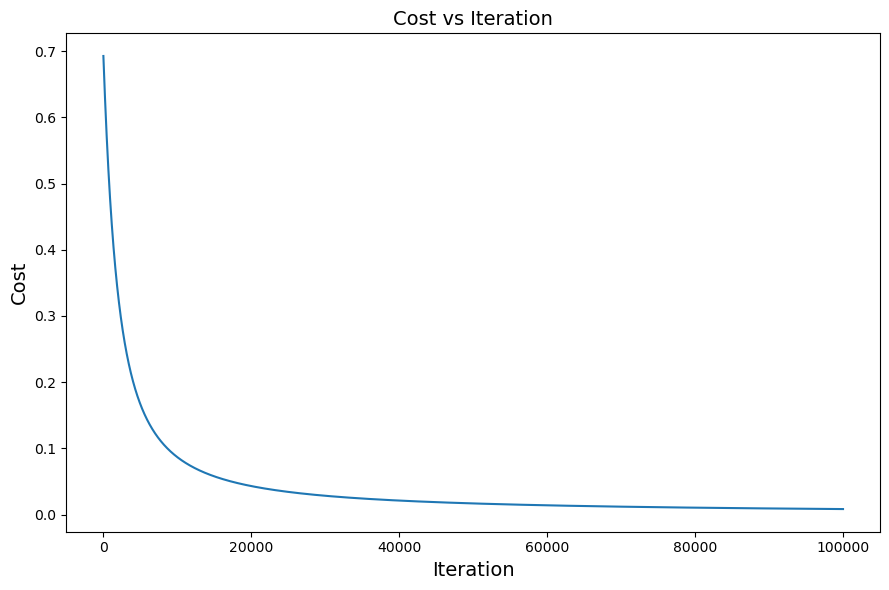

In [12]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()